In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1 (10-Arm Test Bed)

In [ ]:
class Action:
  def __init__(self,m):
    self.q = m
    self.mean = 0
    self.N = 0
  def reward(self):
    return np.random.normal(loc=self.q,scale=1)
  def new_avg(self,x):
    self.N = self.N + 1
    self.mean = ((self.mean*(self.N-1)+x)/self.N)

In [ ]:
def greedy_epsilon(arms, epsilon, epochs):
  actions = [Action(i) for i in arms]
  overall_avg = [0]
  optim_percent = [0]
  for i in range(epochs):

    if np.random.random() < epsilon:
      choice = np.random.randint(0,10)
      
    else:
      choice = np.argmax([q.mean for q in actions])
      


    q_estimate = actions[choice].reward()
    actions[choice].new_avg(q_estimate)

  

    #Information unknown to agent
    alt_actions = np.array([q.reward() for q in actions if q is not choice])
    if q_estimate >= np.max(alt_actions): #Checks if action chosen is optimal relative to the other actions
      optim_action = 1
    else:
      optim_action = 0
    
    overall_optim = (i * optim_percent[-1] + optim_action) / (i + 1)
    optim_percent.append(overall_optim)
    avg = (i * overall_avg[-1] + q_estimate) / (i + 1)
    overall_avg.append(avg)
    ##
  return (overall_avg, [element*100 for element in optim_percent])

In [ ]:
np.random.seed(77)
arms = np.random.normal(size=(1,10)).squeeze().tolist()

In [ ]:
arms

[0.22444485207555556,
 0.6615314728168009,
 -0.5797576393675156,
 0.4078113236033132,
 0.4664793666010543,
 -1.9747090997703725,
 0.2755480127569099,
 -1.5758051725247821,
 1.5683969074549804,
 -0.7247950229927627]

In [ ]:
experiment_0_1, optim_0_1 = greedy_epsilon(arms,0.1,10000)
experiment_0_01, optim_0_01 = greedy_epsilon(arms,0.01,10000)
experiment_0_00, optim_0_00 = greedy_epsilon(arms,0.00,10000)

Text(0.5, 1.0, 'Average Reward for 10-Arm Test Bed')

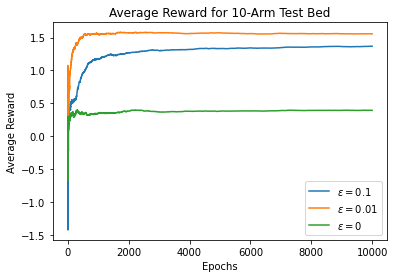

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(experiment_0_1, label='$\epsilon = 0.1$')
exp2, = ax.plot(experiment_0_01, label='$\epsilon = 0.01$')
exp3, = ax.plot(experiment_0_00, label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
ax.set_ylabel("Average Reward")
ax.set_xlabel("Epochs")
ax.set_title("Average Reward for 10-Arm Test Bed")

Text(0.5, 1.0, 'Optimal Action (%) for 10-Arm Test Bed')

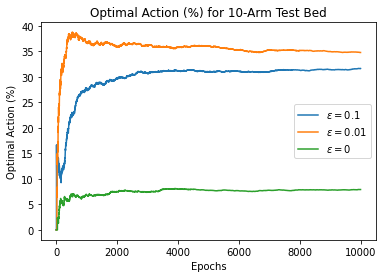

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(optim_0_1, label='$\epsilon = 0.1$')
exp2, = ax.plot(optim_0_01, label='$\epsilon = 0.01$')
exp3, = ax.plot(optim_0_00, label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
ax.set_ylabel("Optimal Action (%)")
ax.set_xlabel("Epochs")
ax.set_title("Optimal Action (%) for 10-Arm Test Bed")

# Part 2 (Ad Optimization)

Dataset from: https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ads_Optimisation.csv")

In [ ]:
class Feature:
  def __init__(self,m):
    self.name = m
    self.mean = 0
    self.total = 0
    self.N = 0
  def new_avg(self,x):
    self.N = self.N + 1
    self.mean = ((self.mean*(self.N-1)+x)/self.N)
  def new_total(self,x):
    self.total += x

In [ ]:
def dataset_bandit(Dataset, epsilon, epochs):
  features = [Feature(i) for i in range(1,len(Dataset.columns)+1)]
  overall_avg = [0]
  optim_percent = [0]
  feature_chosen = []
  for i in range(epochs):

    if np.random.random() < epsilon:
      choice = np.random.randint(0,len(Dataset.columns))
      
    else:
      choice = np.argmax([q.mean for q in features])      


    reward = Dataset.values[i,choice]
    features[choice].new_avg(reward)
    features[choice].new_total(reward)

  

    #Information unknown to agent
    alt_actions = np.array(Dataset.values[i])
    np.delete(alt_actions, choice)
    if reward >= np.max(alt_actions):
      optim_action = 1
    else:
      optim_action = 0
    
    overall_optim = (i * optim_percent[-1] + optim_action) / (i + 1)
    optim_percent.append(overall_optim)
    avg = (i * overall_avg[-1] + reward) / (i + 1)
    overall_avg.append(avg)
    feature_chosen.append(int(choice+1))
    ##
  return (overall_avg, [element*100 for element in optim_percent], [i.total for i in features],feature_chosen)

In [ ]:
avg1, optim1, total1, ad_chosen1 = dataset_bandit(df,0.1,10000)
avg01, optim01, total01, ad_chosen01 = dataset_bandit(df,0.01,10000)
avg00, optim00, total00, ad_chosen00 = dataset_bandit(df,0.0,10000)

Text(0.5, 1.0, 'Average Clicks for 10 Ads')

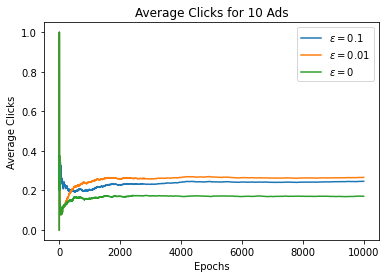

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(avg1, label='$\epsilon = 0.1$')
exp2, = ax.plot(avg01, label='$\epsilon = 0.01$')
exp3, = ax.plot(avg00, label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
ax.set_ylabel("Average Clicks")
ax.set_xlabel("Epochs")
ax.set_title("Average Clicks for 10 Ads")

Text(0.5, 1.0, 'Optimal Action (%) for 10 Ads')

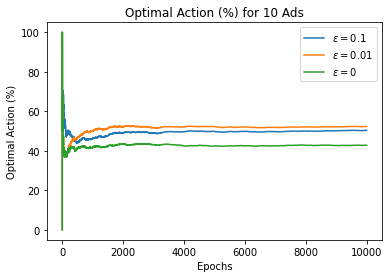

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(optim1, label='$\epsilon = 0.1$')
exp2, = ax.plot(optim01, label='$\epsilon = 0.01$')
exp3, = ax.plot(optim00, label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
ax.set_ylabel("Optimal Action (%)")
ax.set_xlabel("Epochs")
ax.set_title("Optimal Action (%) for 10 Ads")

In [ ]:
import seaborn as sns

In [ ]:
total1

[17, 11, 6, 16, 2174, 1, 14, 210, 9, 2]

In [ ]:
x=[*range(1,11,1)]

In [ ]:
x = ["Ad " + str(i) for i in x]

In [ ]:
total_clicks = df.sum(axis=0)

In [ ]:
total_clicks

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

In [ ]:
total_clicks = total_clicks.to_numpy()

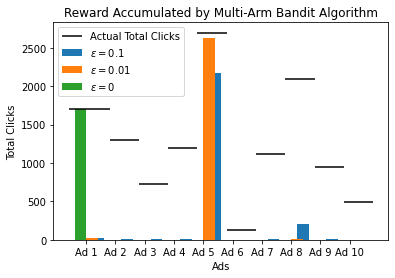

In [ ]:
X_axis = np.arange(len(x))
plt.bar(X_axis + 0.4, total1, 0.4, label = '$\epsilon = 0.1$')
plt.bar(X_axis + 0.2, total01, 0.4, label = '$\epsilon = 0.01$')  
plt.bar(X_axis - 0.2, total00, 0.4, label = '$\epsilon = 0$')
plt.xticks(X_axis, x)
plt.xlabel("Ads")
plt.ylabel("Total Clicks")
plt.title("Reward Accumulated by Multi-Arm Bandit Algorithm")
plt.hlines(total_clicks, xmin=[-0.6,0.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8], xmax= [0.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8,9.8],label = "Actual Total Clicks")
plt.legend(loc=2)
plt.show()

# Part 4 (Federated Bandit)

In [ ]:
import statistics

In [ ]:
class bandit_client:
  def __init__(self,cid,epochs,epsilon):
    self.data = None
    self.cid = cid
    self.features = None
    self.mean = []
    self.diff = []
    self.total = []
    self.epsilon = epsilon
    self.epochs = epochs
    self.reward_avg = []
    self.optim_action = []
  def run_client(self):
    self.reward_avg = [0]
    self.optim_action = [0]
    self.total = []
    for i in range(self.epochs):
      assert self.epochs <= len(self.data)

      if np.random.random() < self.epsilon:
        choice = np.random.randint(0,len(self.data.columns))
      
      else:
        choice = np.argmax([q.mean for q in self.features])      


      reward = self.data.values[i,choice]
      self.features[choice].new_avg(reward)
      self.features[choice].new_total(reward)

  

      #Information unknown to agent
      alt_actions = np.array(self.data.values[i])
      np.delete(alt_actions, choice)
      if reward >= np.max(alt_actions):
        optim_action = 1
      else:
        optim_action = 0
    
      overall_optim = (i * self.optim_action[-1] + optim_action) / (i + 1)
      self.optim_action.append(overall_optim)
      avg = (i * self.reward_avg[-1] + reward) / (i + 1)
      self.reward_avg.append(avg)
    
    ##
  def update_avg(self, glob_model):
    for feature, new_mean in zip(self.features, glob_model):
      feature.mean = new_mean
  def get_avg(self):
    return self.mean
  def get_total(self):
    return [i.total for i in self.features]
  def get_diff(self,glob_model):
    self.diff = []
    zip_object = zip(self.features, glob_model)
    for feature, glob_model in zip_object:
      self.diff.append(feature.mean - glob_model)
    return self.diff
  def sample_data(self,minibatch):
    self.data = minibatch
    self.features = [Feature(i) for i in range(1,len(self.data.columns)+1)]

In [ ]:
from dataclasses import replace
def federated_bandit(Dataset, epsilon, local_epochs, global_rounds, num_clients):
  iid_data = np.array_split(Dataset, num_clients)
  client_list = []
  global_mean = np.zeros(len(Dataset.columns))
  avg_diff = []
  global_total = []
  global_optim = [0]
  global_reward = [0]
  N=0
  for client in range(0,num_clients):
    client_list.append(bandit_client(client, local_epochs, epsilon))
  for round in range(0,global_rounds):
    client_diffs = []
    client_totals = []
    client_optim = []
    client_reward = []
    for client in client_list:
      client.sample_data(iid_data[client.cid].sample(frac=0.1, replace=False))
      client.update_avg(global_mean)
      client.run_client()
      client_diffs.append(client.get_diff(global_mean))
      client_totals.append(client.get_total())
      client_optim.append(client.optim_action[1:])
      client_reward.append(client.reward_avg[1:])
    avg_diff = [statistics.mean(k) for k in zip(*client_diffs)]
    global_mean = np.add(global_mean, avg_diff)
    global_total.append([sum(k) for k in zip(*client_totals)])

    
    global_optim = np.append(global_optim, (round * global_optim[-1] + np.mean(client_optim)) / (round + 1))
    global_reward = np.append(global_reward, (round * global_optim[-1] + np.mean(client_reward)) / (round + 1))
  return (global_total, global_reward, [element*100 for element in global_optim], client_list)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ads_Optimisation.csv")

In [ ]:
total1, reward1, percent1, clients1 = federated_bandit(df, 0.1, 10, 10, 100)
total01, reward01, percent01, clients01 = federated_bandit(df, 0.01, 10, 10, 100)
total00, reward00, percent00, clients00 = federated_bandit(df, 0.0, 10, 10, 100)

Text(0.5, 1.0, 'Average Clicks for Federated Ad Bandit')

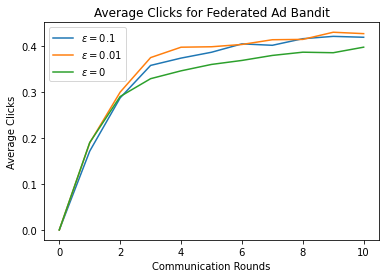

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(reward1, label='$\epsilon = 0.1$')
exp2, = ax.plot(reward01, label='$\epsilon = 0.01$')
exp3, = ax.plot(reward00, label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
ax.set_ylabel("Average Clicks")
ax.set_xlabel("Communication Rounds")
plt.locator_params(axis='x', nbins=10)
#plt.xticks(np.arange(10), np.arange(1, 11))
ax.set_title("Average Clicks for Federated Ad Bandit")

Text(0.5, 1.0, 'Optimal Action for Federated Ad Bandit')

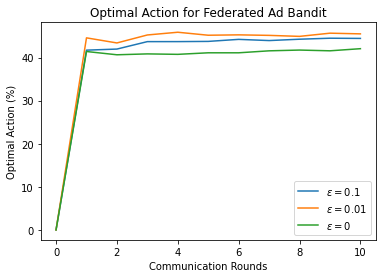

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(percent1, label='$\epsilon = 0.1$')
exp2, = ax.plot(percent01, label='$\epsilon = 0.01$')
exp3, = ax.plot(percent00, label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
ax.set_ylabel("Optimal Action (%)")
ax.set_xlabel("Communication Rounds")
plt.locator_params(axis='x', nbins=10)
#plt.xticks(np.arange(10), np.arange(1, 11))
ax.set_title("Optimal Action for Federated Ad Bandit")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


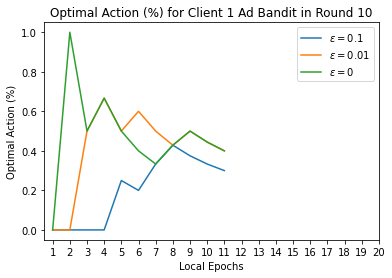

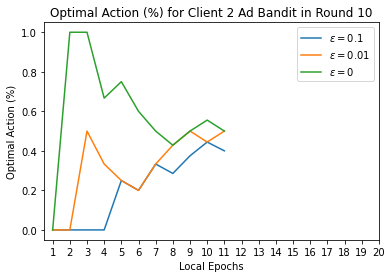

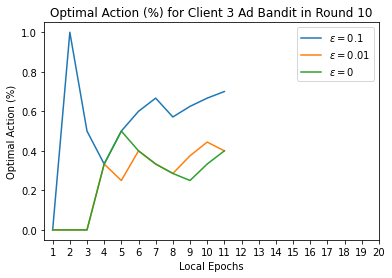

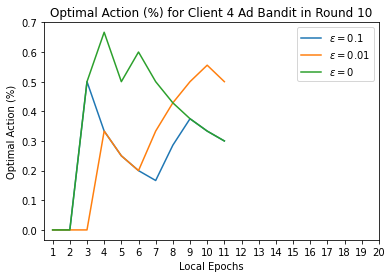

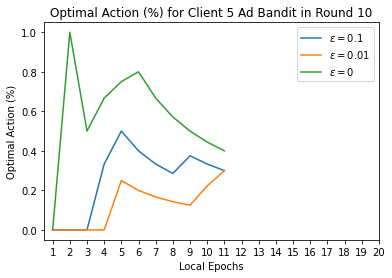

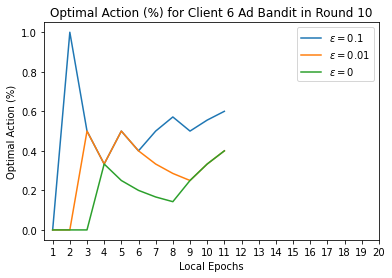

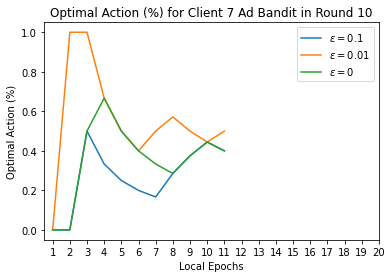

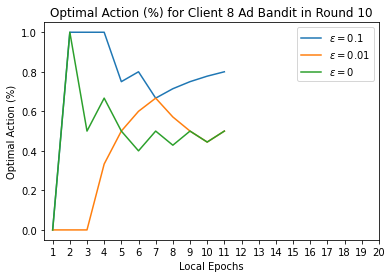

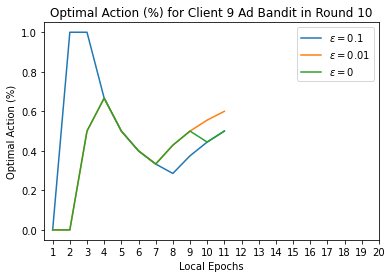

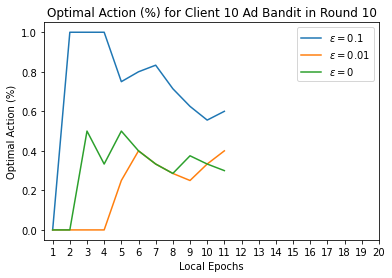

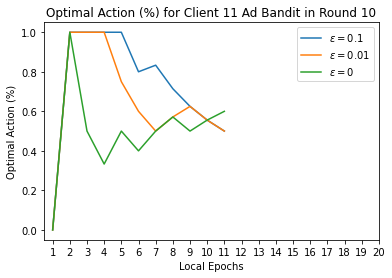

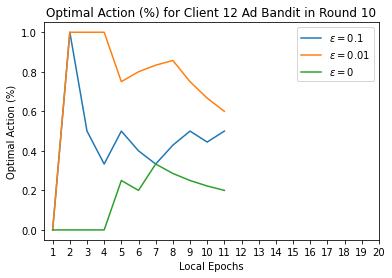

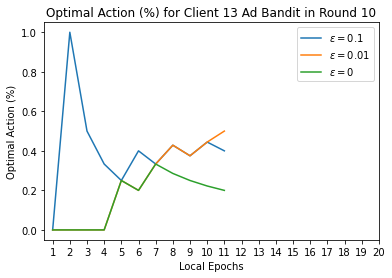

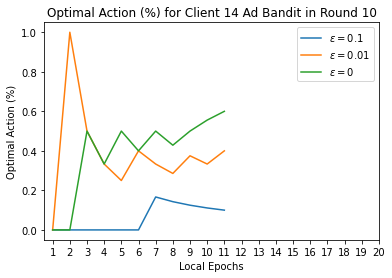

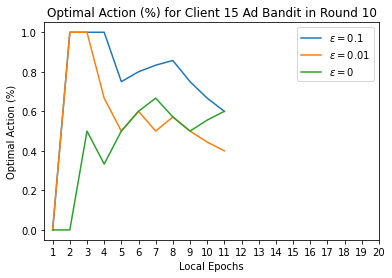

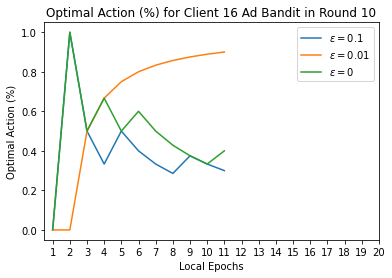

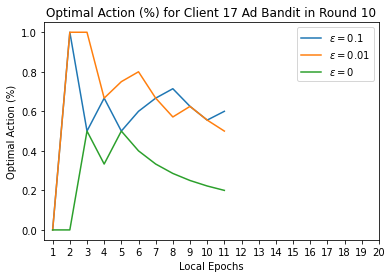

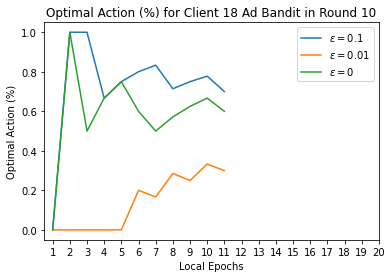

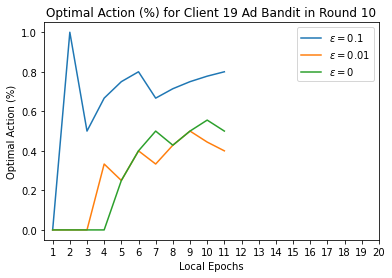

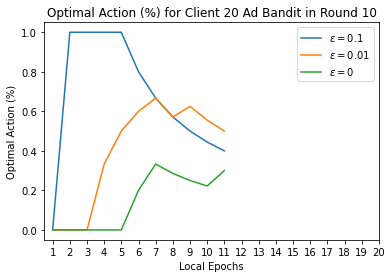

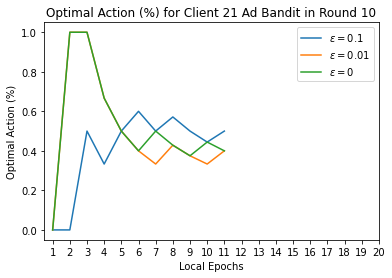

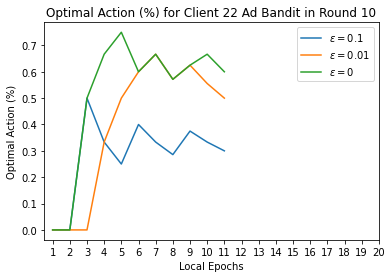

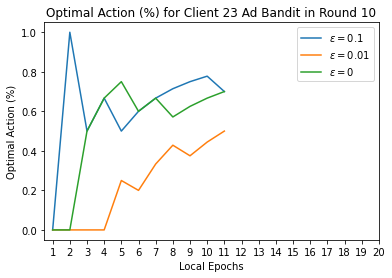

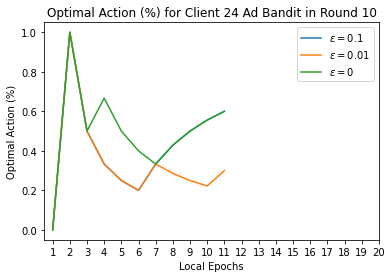

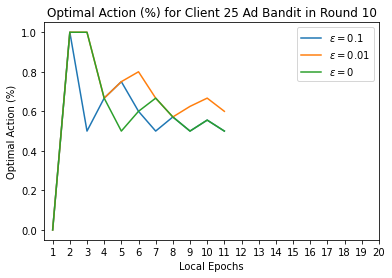

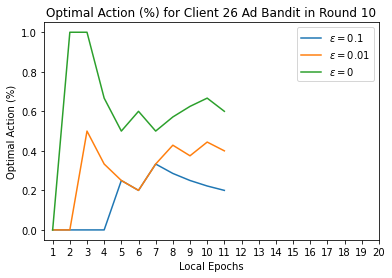

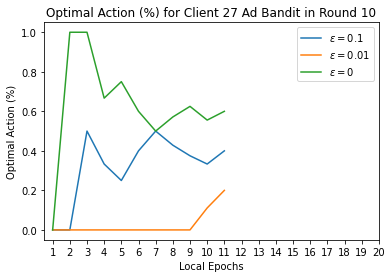

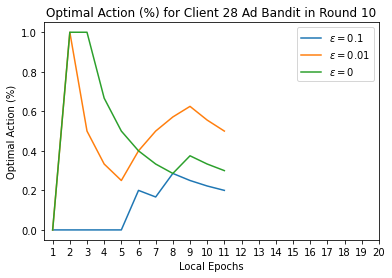

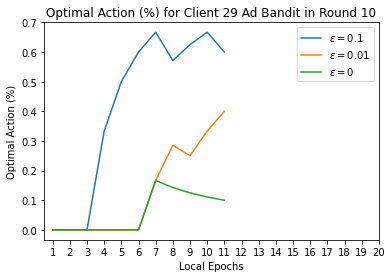

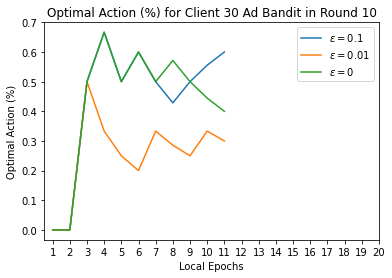

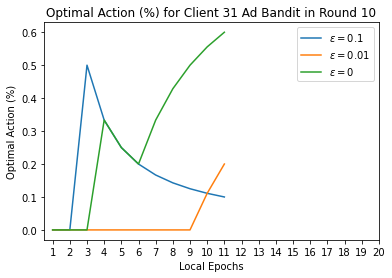

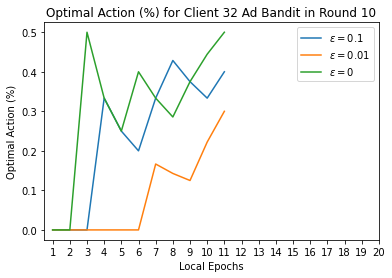

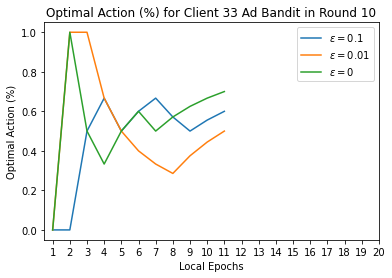

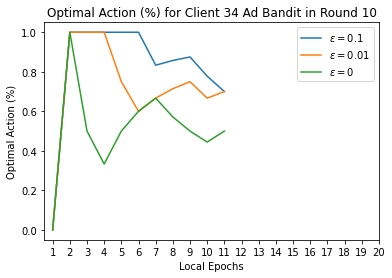

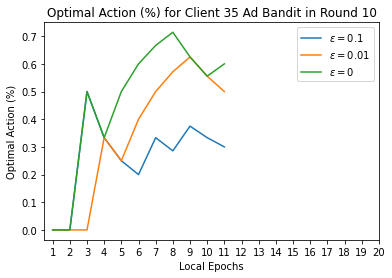

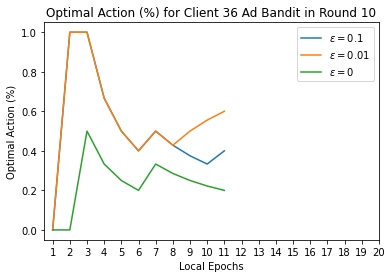

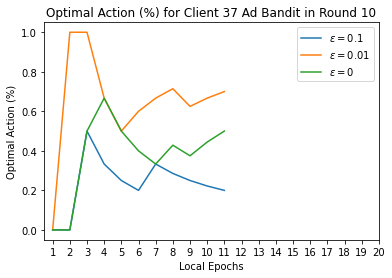

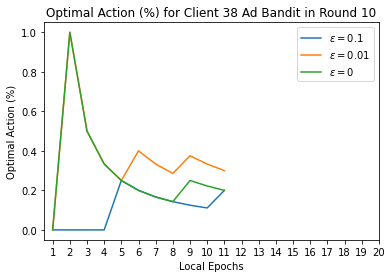

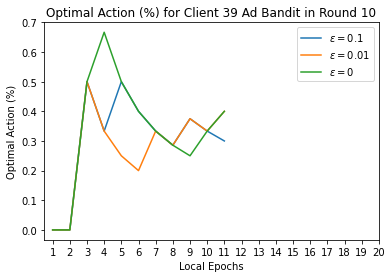

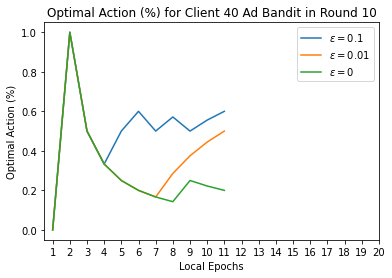

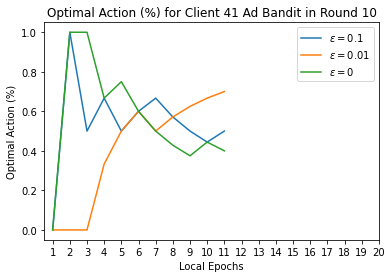

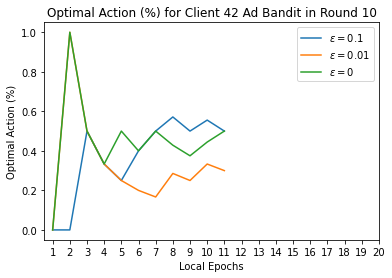

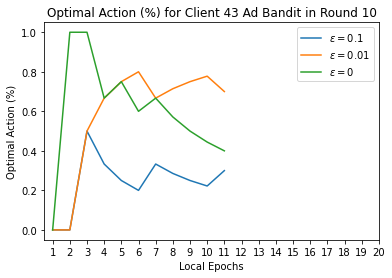

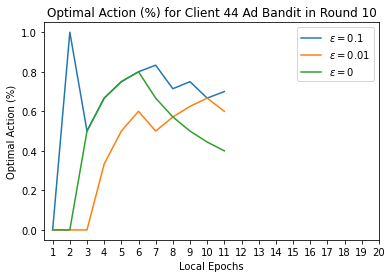

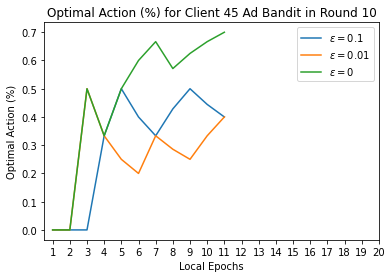

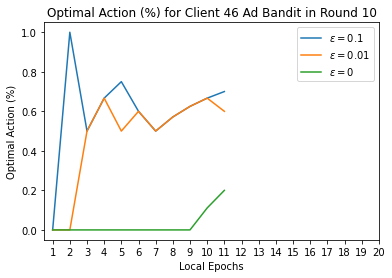

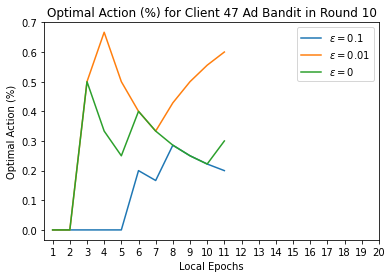

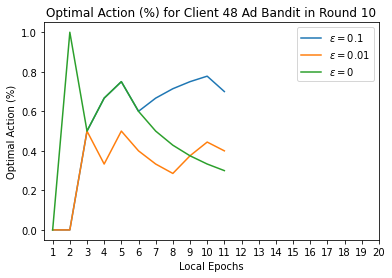

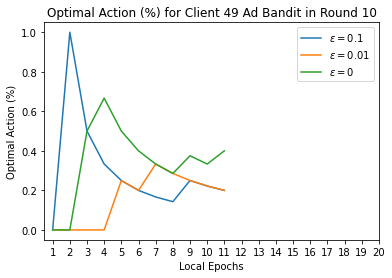

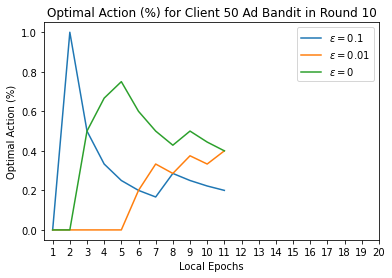

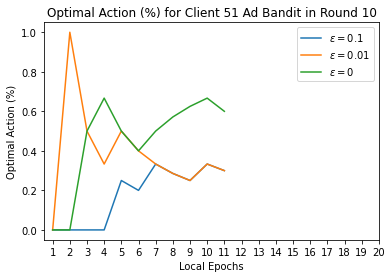

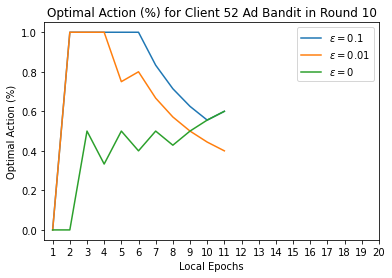

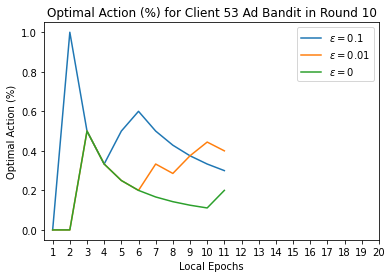

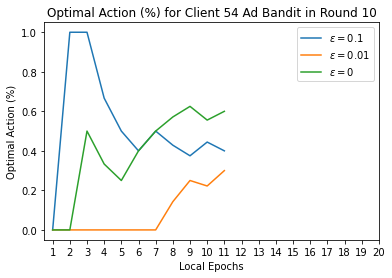

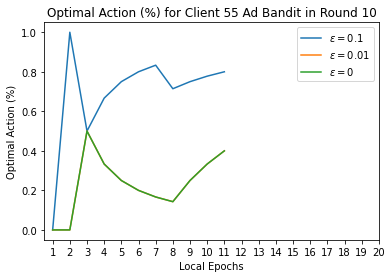

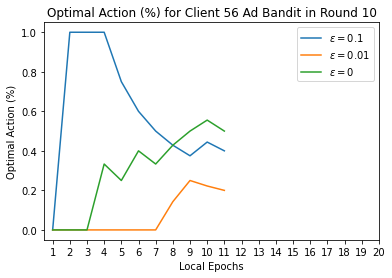

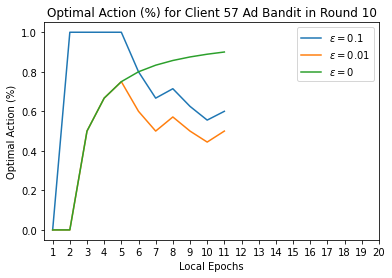

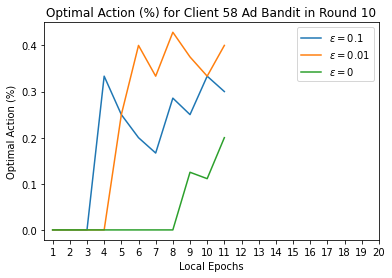

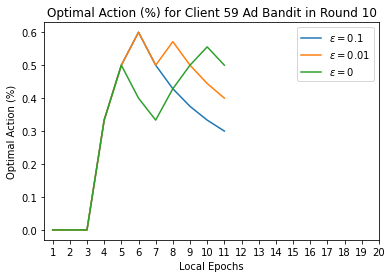

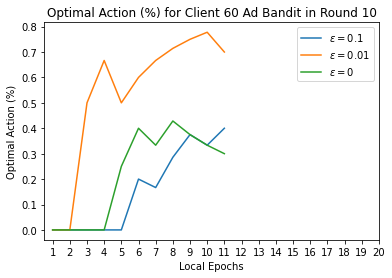

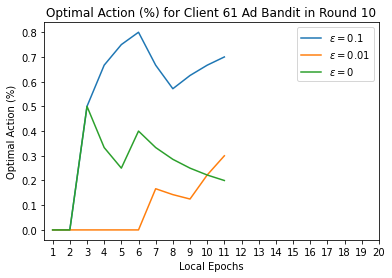

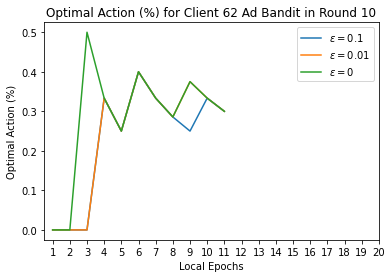

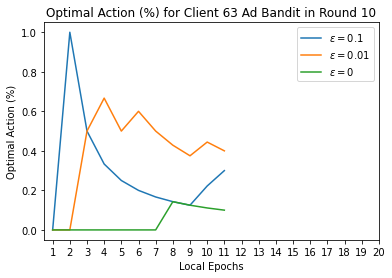

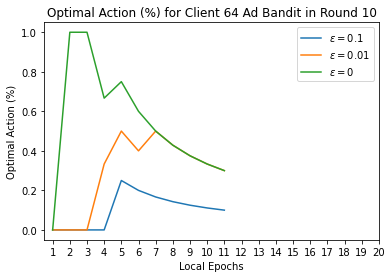

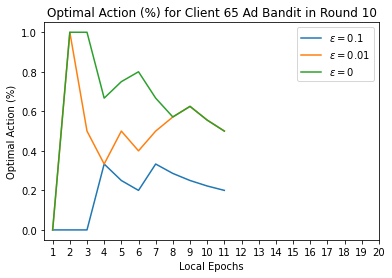

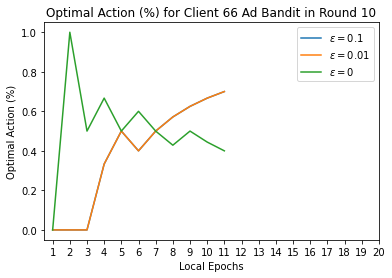

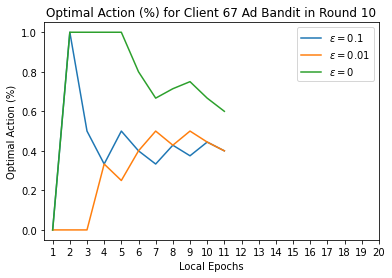

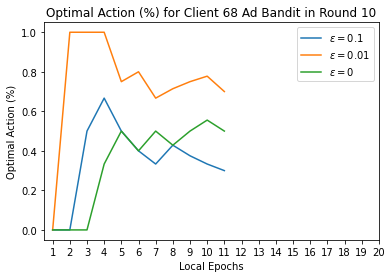

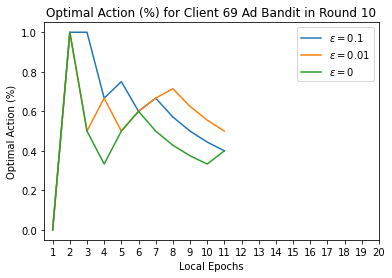

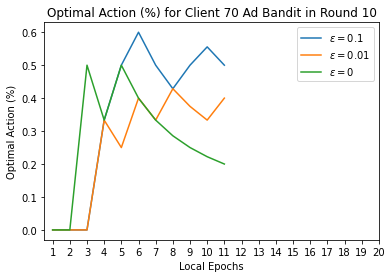

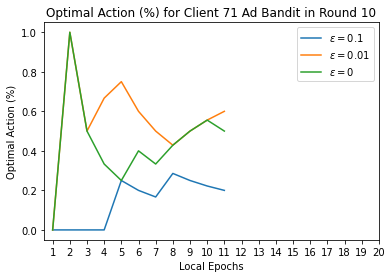

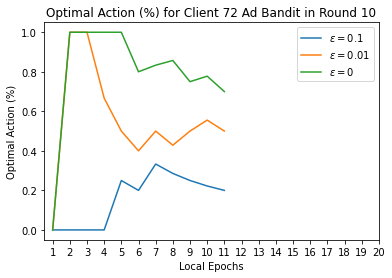

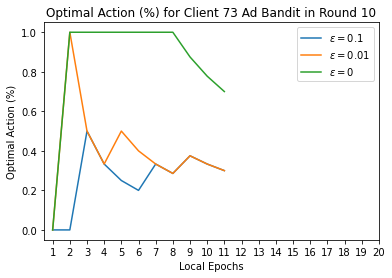

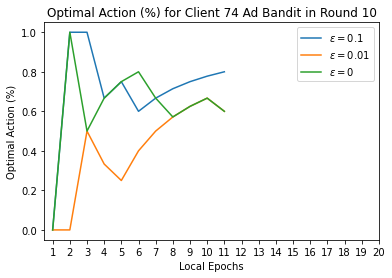

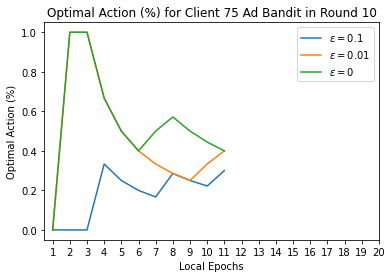

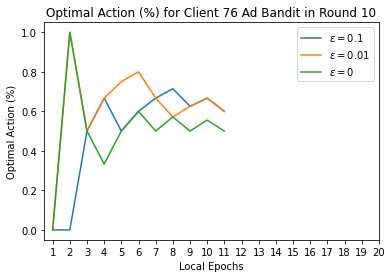

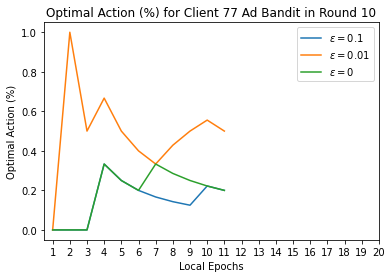

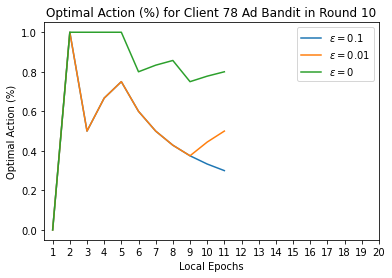

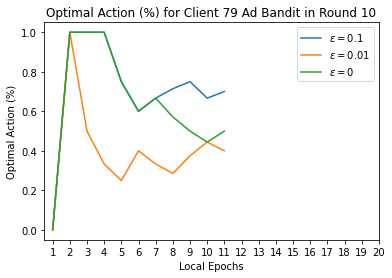

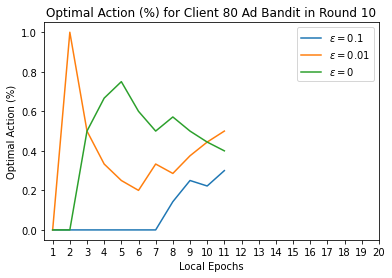

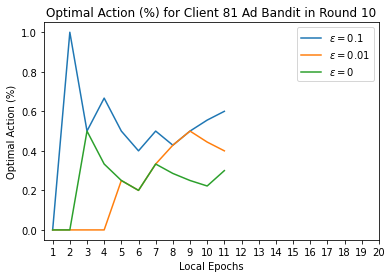

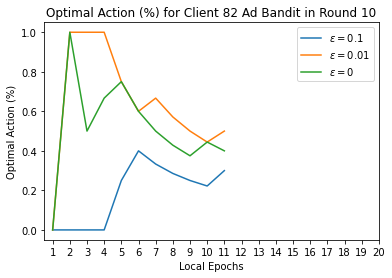

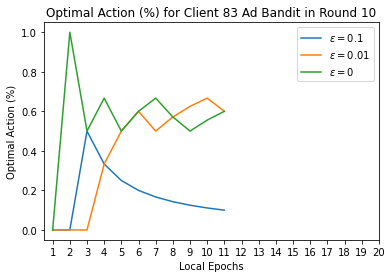

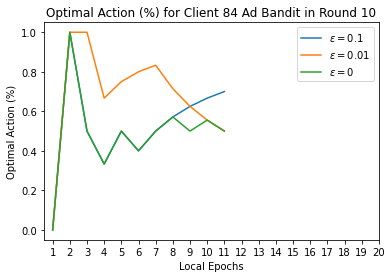

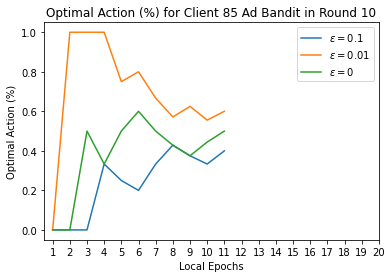

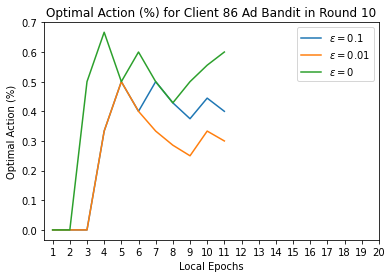

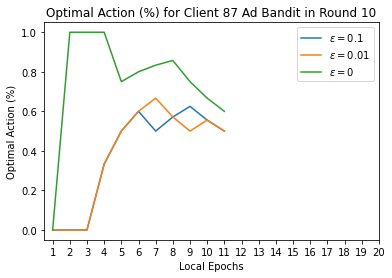

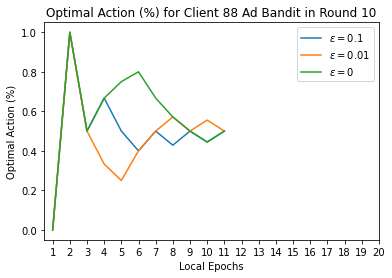

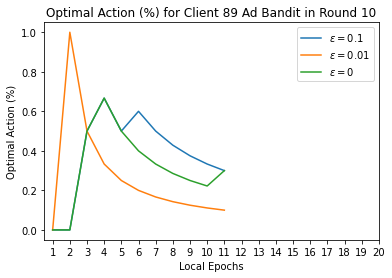

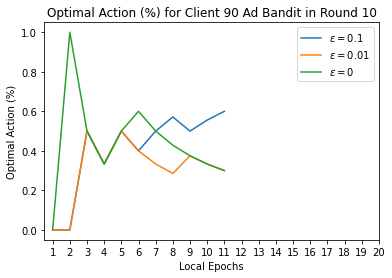

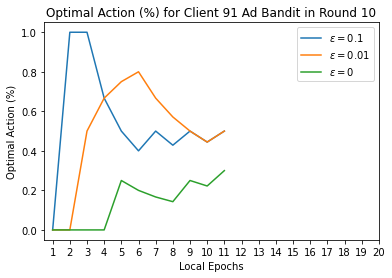

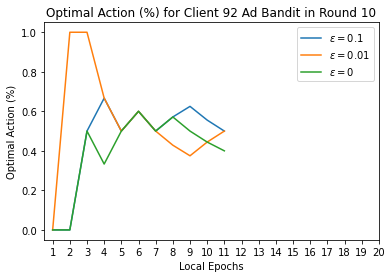

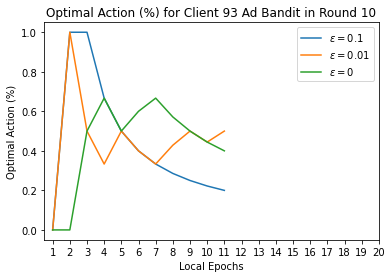

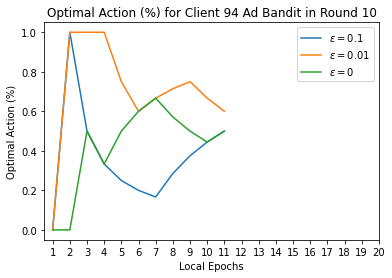

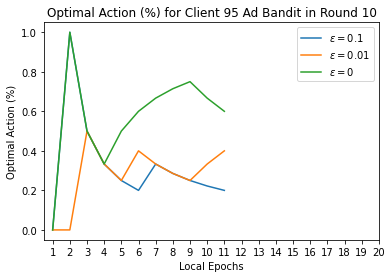

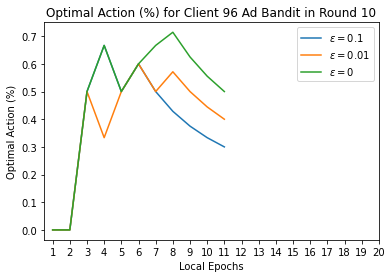

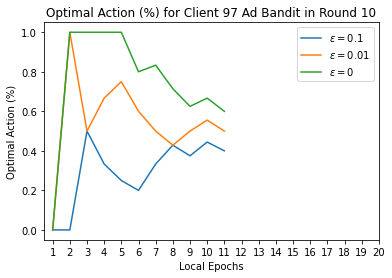

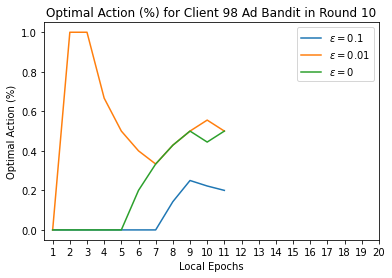

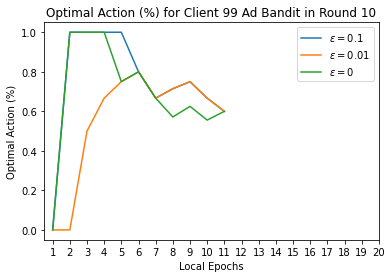

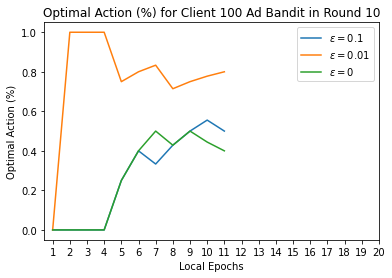

In [ ]:
for i in range(0,100):
  fig, ax = plt.subplots()
  exp1, = ax.plot(clients1[i].optim_action, label='$\epsilon = 0.1$')
  exp2, = ax.plot(clients01[i].optim_action, label='$\epsilon = 0.01$')
  exp3, = ax.plot(clients00[i].optim_action, label='$\epsilon = 0$')
  ax.legend(handles=[exp1,exp2,exp3])
  plt.locator_params(axis='x', nbins=20)
  plt.xticks(np.arange(20), np.arange(1, 21))
  ax.set_ylabel("Optimal Action (%)")
  ax.set_xlabel("Local Epochs")
  ax.set_title("Optimal Action (%) for Client " + str(i+1) + " Ad Bandit in Round 10")

Text(0.5, 1.0, 'Total Reward for Federated Ad Bandit')

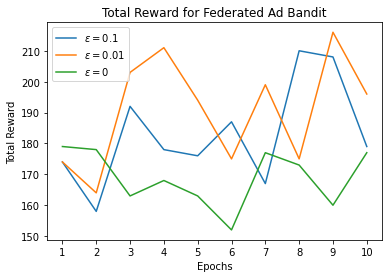

In [ ]:
fig, ax = plt.subplots()
exp1, = ax.plot(np.sum(total1,axis=1), label='$\epsilon = 0.1$')
exp2, = ax.plot(np.sum(total01,axis=1), label='$\epsilon = 0.01$')
exp3, = ax.plot(np.sum(total00,axis=1), label='$\epsilon = 0$')
ax.legend(handles=[exp1,exp2,exp3])
plt.locator_params(axis='x', nbins=13)
plt.xticks(np.arange(len(total01)), np.arange(1, len(total01)+1))
ax.set_ylabel("Total Reward")
ax.set_xlabel("Epochs")
ax.set_title("Total Reward for Federated Ad Bandit")

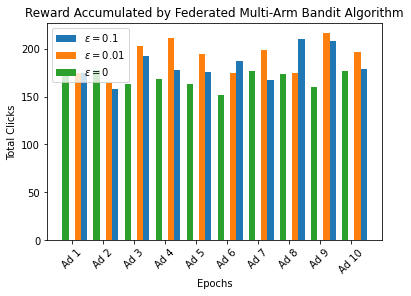

In [ ]:
x_epoch = ["Epoch " + str(i) for i in range(1,11)]
X_epoch_axis = np.arange(len(x_epoch))
plt.bar(X_epoch_axis + 0.4, np.sum(total1, axis=1), 0.2, label = '$\epsilon = 0.1$')
plt.bar(X_epoch_axis + 0.2, np.sum(total01,axis=1), 0.2, label = '$\epsilon = 0.01$')  
plt.bar(X_epoch_axis - 0.2, np.sum(total00,axis=1), 0.2, label = '$\epsilon = 0$')
plt.xticks(X_epoch_axis, x, rotation=45)
plt.xlabel("Epochs")
plt.ylabel("Total Clicks")
plt.title("Reward Accumulated by Federated Multi-Arm Bandit Algorithm")
plt.legend(loc=2)
plt.show()

In [ ]:
total1 = np.sum(total1, axis=0)
total01 = np.sum(total01, axis=0)
total00 = np.sum(total00, axis=0)

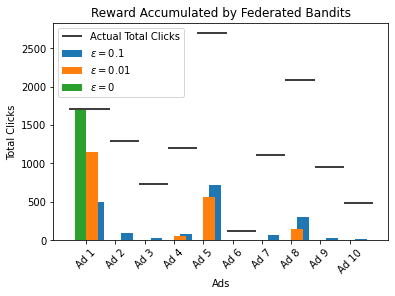

In [ ]:
plt.bar(X_axis + 0.4, total1, 0.4, label = '$\epsilon = 0.1$')
plt.bar(X_axis + 0.2, total01, 0.4, label = '$\epsilon = 0.01$')  
plt.bar(X_axis - 0.2, total00, 0.4, label = '$\epsilon = 0$')
plt.xticks(X_axis, x)
plt.xlabel("Ads")
plt.ylabel("Total Clicks")
plt.xticks(rotation=45)
plt.title(("Reward Accumulated by Federated Bandits"))
plt.hlines(total_clicks, xmin=[-0.6,0.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8], xmax= [0.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8,9.8],label = "Actual Total Clicks")
plt.legend(loc=2)
plt.show()